In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
import pickle


In [1]:
def a(v):
    print(v)
    
def b():
    print(1)
    
def test(f, p):
    f(*p)


In [8]:
test(b, ())

1


Text(0.5, 1.05, 'Center:')

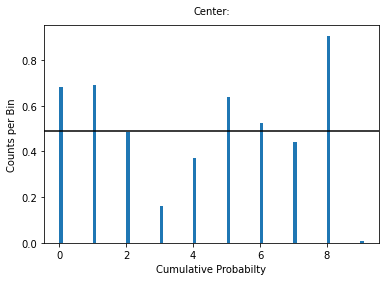

In [6]:
fig, ax = plt.subplots()
a = np.random.random(10)
b = np.linspace(0,10,11)
plt.bar(b[:-1], a, 1/(len(b)-1), align="edge", color="#1f77b4")
plt.axhline(np.average(a), color="black")
plt.xlabel("Cumulative Probabilty")
plt.ylabel("Counts per Bin")
plt.text(0.5, 1.05, f"Center:", ha="center", transform=ax.transAxes)

In [228]:
len1 = 20
len2 = 100

time1 = 2000
time2 = 1000
rate1 = 33
rate2 = 30

times1 = np.repeat(time1, 20)
times1 = times1[:,np.newaxis]

times2 = np.repeat(time2, 20)
times2 = times2[:,np.newaxis]

counts1 = np.full((len1, len2), rate1)
counts1 = counts1 * times1
counts1 = np.random.poisson(counts1)

counts2 = np.full((len1, len2), rate2)
counts2 = counts2 * times2
counts2 = np.random.poisson(counts2)


rate = (counts1 + counts2) / (times1 + times2)
var0 = (counts1**2 + counts2**2) / 2
e_var0 = (counts1 + counts2 + rate**2 * (times1**2 + times2**2)) / 2

t_var0 = np.sum(var0)
t_e_var0 = np.sum(e_var0)


mean = (counts1 + counts2) / 2
var = (counts1 - mean)**2 + (counts2 - mean)**2
e_var = (rate*times1 - mean)**2 + (rate*times2 - mean)**2 + rate*(times1 + times2) / 2

print(var)
print(e_var)

print(np.sum(var))
print(np.sum(e_var))
print(np.sum(var) / np.sum(e_var))

# print(np.average(var0/e_var0))
# print(t_var0/t_e_var0)

[[6.47460112e+08 6.41285484e+08 6.54713298e+08 ... 6.26969460e+08
  6.40641012e+08 6.33252872e+08]
 [6.35140440e+08 6.47424128e+08 6.37637760e+08 ... 6.34926612e+08
  6.38709540e+08 6.52832978e+08]
 [6.39925312e+08 6.37816328e+08 6.60479512e+08 ... 6.41894450e+08
  6.59208050e+08 6.53375100e+08]
 ...
 [6.59752812e+08 6.33395232e+08 6.56161538e+08 ... 6.43328450e+08
  6.39102752e+08 6.65358720e+08]
 [6.27004872e+08 6.50883200e+08 6.57974088e+08 ... 6.40676808e+08
  6.61315712e+08 6.46309104e+08]
 [6.54749484e+08 6.37530632e+08 6.38423644e+08 ... 6.43149112e+08
  6.36424164e+08 6.61315712e+08]]
[[5.11333549e+08 5.12378736e+08 5.12944434e+08 ... 5.09735841e+08
  5.08076876e+08 5.12176014e+08]
 [5.10928560e+08 5.12901729e+08 5.13595907e+08 ... 5.03391161e+08
  5.10545034e+08 5.14098144e+08]
 [5.10587641e+08 5.08682723e+08 5.17020245e+08 ... 5.14825219e+08
  5.11493458e+08 5.12784299e+08]
 ...
 [5.15734785e+08 5.11514781e+08 5.13008495e+08 ... 5.14761045e+08
  5.09682627e+08 5.07566970e+08]

In [106]:
# b, s1, t1, s2, t2

# b var: lin, lin, exp, quad, exp
# cov: quad, lin, pwl, quad, exp
# s1 var: const, lin, pwl, const, const

[[0.99104157 0.98893123 1.01049198 ... 0.9907212  1.00595238 0.98969072]
 [1.01245151 0.99049505 0.99631626 ... 0.99307483 0.99036836 0.99088617]
 [0.99002193 0.99352267 0.98988145 ... 0.9971107  0.99252479 0.99416091]
 ...
 [0.98987375 1.00710183 0.9895565  ... 0.99766472 1.00052155 0.99065722]
 [0.98949939 1.00959205 0.99366337 ... 0.99237543 0.99924509 0.98998273]
 [0.99096655 0.99643564 0.99130037 ... 0.99382825 0.98969072 0.99422185]]
0.9951385176767553
